In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('GBPUSD=X.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-02-28,1.206302,1.214255,1.202762,1.206156,1.206156,0
1,2023-03-01,1.203138,1.208824,1.196688,1.203355,1.203355,0
2,2023-03-02,1.203036,1.203630,1.192762,1.202993,1.202993,0
3,2023-03-03,1.195043,1.201880,1.194929,1.195157,1.195157,0
4,2023-03-06,1.203051,1.204805,1.199443,1.202848,1.202848,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       262 non-null    object 
 1   Open       262 non-null    float64
 2   High       262 non-null    float64
 3   Low        262 non-null    float64
 4   Close      262 non-null    float64
 5   Adj Close  262 non-null    float64
 6   Volume     262 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.5+ KB


In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,262.000000,262.000000,262.000000,262.000000,262.000000,262.0
mean,1.251877,1.255908,1.247641,1.251852,1.251852,0.0
std,0.024111,0.023843,0.024012,0.024103,0.024103,0.0
min,1.182942,1.185789,1.180791,1.182774,1.182774,0.0
25%,1.236939,1.242071,1.233680,1.237172,1.237172,0.0
50%,1.256826,1.259811,1.252270,1.256865,1.256865,0.0
75%,1.270386,1.273691,1.265971,1.270374,1.270374,0.0
max,1.313146,1.314233,1.309518,1.312853,1.312853,0.0


In [7]:
# Preprocessing
df.drop('Volume', axis=1, inplace=True)  # Dropping 'Volume' column
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.drop('Date', axis=1, inplace=True)  # Drop 'Date' after extracting year, month, day

In [8]:
# Feature Scaling
features_to_scale = ['Open', 'High', 'Low', 'Adj Close']
scaler = StandardScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

In [9]:
# Splitting the dataset for Random Forest Regression
split_index = int(len(df) * 0.8)
train_df = df.iloc[:split_index]
test_df = df.iloc[split_index:]
X_train = train_df.drop('Close', axis=1)
y_train = train_df['Close']
X_test = test_df.drop('Close', axis=1)
y_test = test_df['Close']

In [10]:
# Random Forest Regression Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
predictions = rf_model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

In [11]:
# Model Evaluation Metrics
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

MAE: 0.0002476362264152699
RMSE: 0.0003575734999468415


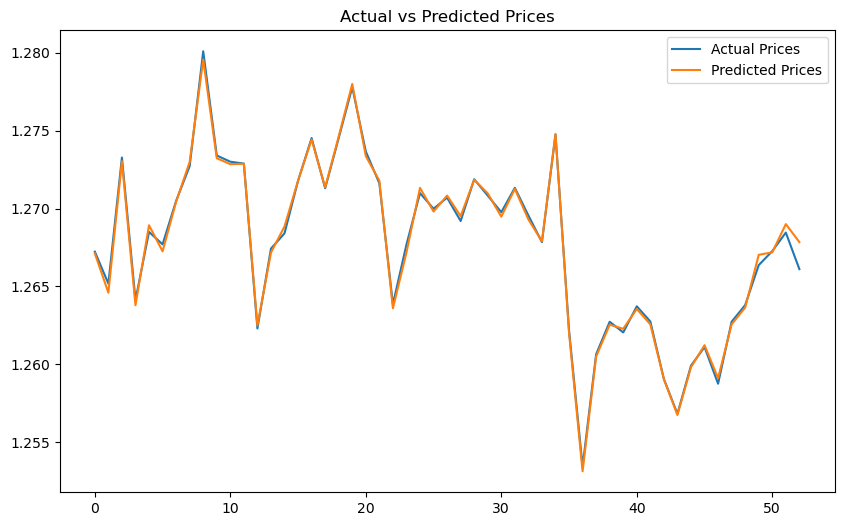

In [12]:
# Visualization of Actual vs Predicted Prices
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Prices')
plt.plot(predictions, label='Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()

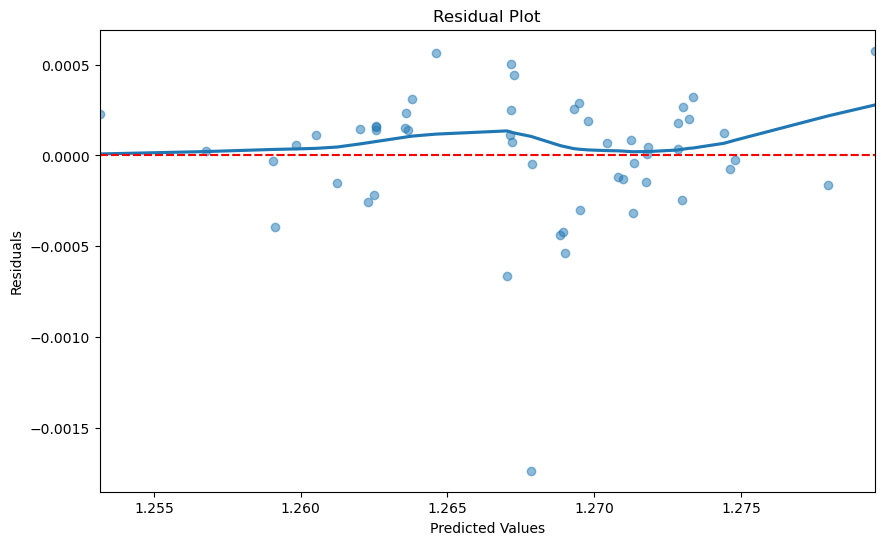

In [23]:
import seaborn as sns

# Assuming 'predictions' are the predictions from your model and 'y_test' are the actual values
residuals = y_test - predictions

plt.figure(figsize=(10, 6))
sns.residplot(x=predictions, y=residuals, lowess=True, scatter_kws={'alpha': 0.5})
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


In [13]:
# K-means Clustering
X_clustering = df.drop(['Close', 'Year', 'Month', 'Day'], axis=1)  # Excluding date features and target variable
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_clustering)
silhouette_avg = silhouette_score(X_clustering, kmeans.labels_)

C:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [14]:
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.5324899537220722


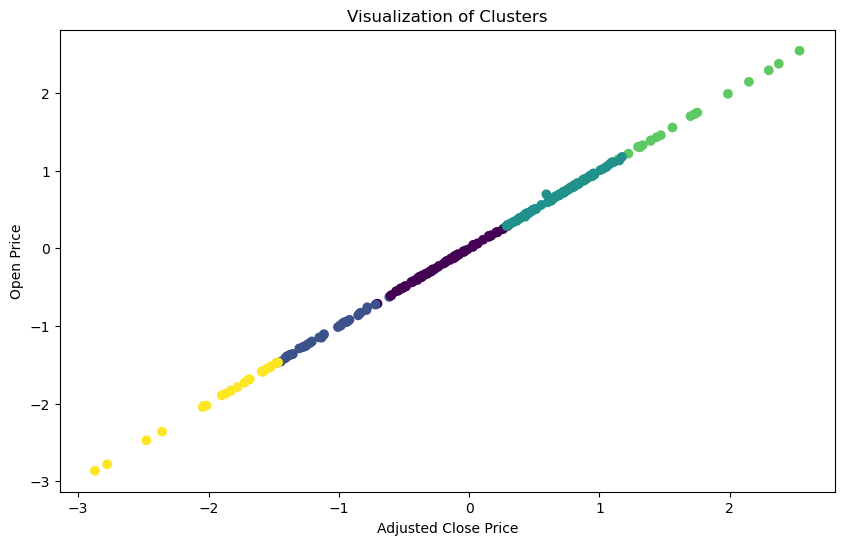

In [15]:
# Visualizing Clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['Adj Close'], df['Open'], c=kmeans.labels_, cmap='viridis')
plt.title('Visualization of Clusters')
plt.xlabel('Adjusted Close Price')
plt.ylabel('Open Price')
plt.show()

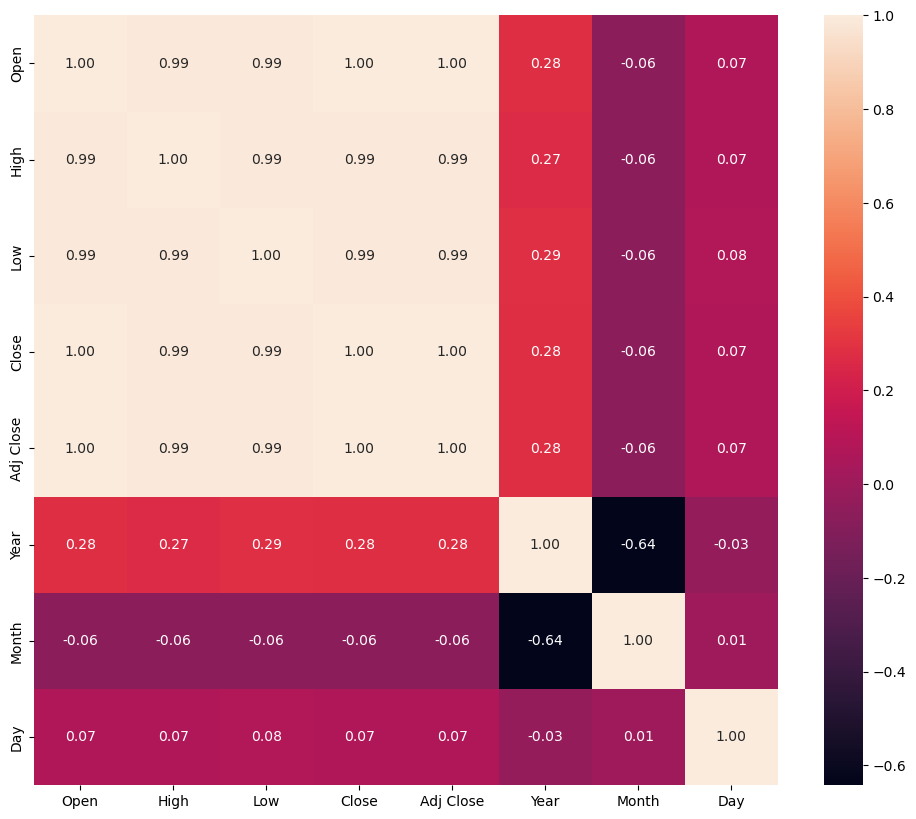

In [18]:
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()
